In [28]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [29]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [30]:
cursor.execute('SELECT * FROM household_181')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

household_181 = pd.DataFrame(data=rows, columns=col_names )

In [31]:
household_181.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136245 entries, 0 to 136244
Columns: 182 entries, control to year
dtypes: float64(181), object(1)
memory usage: 189.2+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9138D5D30>]],
      dtype=object)

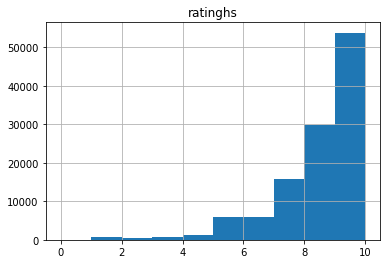

In [41]:
#histogram of how many people gave a certain housing rating
household_181.hist(column='ratinghs', bins = 10, range = [0,10])

In [44]:
#How many people gave a combination of each score for house and neighborhood
pd.crosstab(household_181.ratinghs, household_181.ratingnh)

ratingnh,-9.0,-6.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
ratinghs,,,,,,,,,,,,
-9.0,4049,0,3,1,0,3,4,6,12,22,26,25
-6.0,0,17774,0,0,0,0,0,0,0,0,0,0
1.0,5,2,261,38,36,28,97,40,53,97,45,132
2.0,4,5,58,90,23,27,67,24,28,37,17,22
3.0,3,1,78,52,164,65,125,58,74,73,36,56
4.0,3,3,42,61,107,296,201,151,135,128,57,55
5.0,19,11,103,130,268,339,2440,491,826,691,229,376
6.0,15,2,36,37,116,288,704,1932,1043,1052,306,301
7.0,20,8,45,58,150,266,1135,1472,7166,3123,1345,975


In [53]:
#The average rating of the neighborhood based on the number of adults who live in the house and if they agree (1) or disagree (2) that there is good pub transport
#Surprisingly, The average rating of the neghborhood is higher where people don't think there is good public transport
Adults = household_181.groupby(['numadults', 'nhqpubtrn'])
Adults['ratingnh'].agg(np.mean)

numadults  nhqpubtrn
-6.0       -9.0         -6.000000
           -6.0         -6.000000
            1.0         -6.000000
            2.0         -6.000000
 0.0       -9.0          0.000000
            1.0          4.875000
            2.0          6.800000
 1.0       -9.0          0.675009
            1.0          7.639511
            2.0          7.925227
 2.0       -9.0          0.423859
            1.0          7.986800
            2.0          8.307315
 3.0       -9.0         -0.500686
            1.0          7.973374
            2.0          8.312900
 4.0       -9.0         -1.163522
            1.0          7.904848
            2.0          8.366209
 5.0       -9.0         -2.655914
            1.0          8.032895
            2.0          8.076046
 6.0       -9.0         -4.740741
            1.0          7.990654
            2.0          8.186275
 7.0       -9.0         -1.666667
            1.0          8.145161
            2.0          8.096774
 8.0       -9.0         -9.

In [57]:
#The average rating of the neighborhood based on the number of young kids who live in the house and if they agree (1) or disagree (2) that there is good schools
#Unsurprisingly, The average rating of the neghborhood is higher where people think there are good schools
#Even households that had no kids ranked a school-friendly neighborhood as more satisfactory
YKids = household_181.groupby(['numyngkids', 'nhqschool'])
YKids['ratingnh'].agg(np.mean)

numyngkids  nhqschool
-6.0        -9.0         -6.000000
            -6.0         -6.000000
             1.0         -6.000000
             2.0         -6.000000
 0.0        -9.0          3.110264
             1.0          8.281553
             2.0          6.705157
 1.0        -9.0          2.246175
             1.0          8.058398
             2.0          6.240275
 2.0        -9.0          0.973214
             1.0          8.094149
             2.0          6.185780
 3.0        -9.0          1.921053
             1.0          8.048257
             2.0          6.365079
 4.0        -9.0         10.000000
             1.0          7.893617
             2.0          6.777778
 5.0         1.0          7.428571
             2.0          5.000000
 6.0        -9.0          9.000000
Name: ratingnh, dtype: float64

In [58]:
#The average rating of the neighborhood based on the number of old kids who live in the house and if they agree (1) or disagree (2) that there is good schools
#Unsurprisingly, The average rating of the neghborhood is higher where people think there are good schools
OKids = household_181.groupby(['numoldkids', 'nhqschool'])
OKids['ratingnh'].agg(np.mean)

numoldkids  nhqschool
-6.0        -9.0        -6.000000
            -6.0        -6.000000
             1.0        -6.000000
             2.0        -6.000000
 0.0        -9.0         3.546521
             1.0         8.277327
             2.0         6.713457
 1.0        -9.0        -1.670588
             1.0         8.162503
             2.0         6.519658
 2.0        -9.0        -2.462604
             1.0         8.239764
             2.0         6.403015
 3.0        -9.0        -3.134454
             1.0         8.161171
             2.0         6.178771
 4.0        -9.0        -4.500000
             1.0         8.093596
             2.0         5.853211
 5.0        -9.0        -2.000000
             1.0         7.972789
             2.0         6.800000
 6.0        -9.0        -1.500000
             1.0         8.615385
             2.0         4.777778
 7.0         1.0         8.400000
             2.0         8.000000
 8.0         1.0         8.000000
Name: ratingnh, dtype: flo

In [59]:
FirstHomeCrime = household_181.groupby(['firsthome', 'nhqscrime'])
FirstHomeCrime['ratingnh'].agg(np.mean)

firsthome  nhqscrime
-9.0       -9.0        -8.211724
            1.0         4.890756
            2.0         6.836271
-6.0       -9.0        -3.787862
           -6.0        -6.000000
            1.0         4.431457
            2.0         5.801695
 1.0       -9.0        -3.995169
            1.0         6.215270
            2.0         8.283877
 2.0       -9.0        -5.095607
            1.0         6.759392
            2.0         8.646915
Name: ratingnh, dtype: float64

In [60]:
FirstHomeCrime = household_181.groupby(['firsthome', 'nhqpcrime'])
FirstHomeCrime['ratingnh'].agg(np.mean)

firsthome  nhqpcrime
-9.0       -9.0        -8.130095
            1.0         5.972393
            2.0         6.905318
-6.0       -9.0        -2.721961
           -6.0        -6.000000
            1.0         5.004184
            2.0         5.871147
 1.0       -9.0        -2.415385
            1.0         6.879013
            2.0         8.432028
 2.0       -9.0        -3.482366
            1.0         7.458046
            2.0         8.724494
Name: ratingnh, dtype: float64

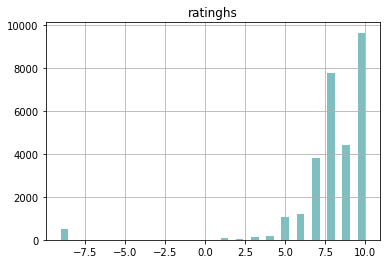

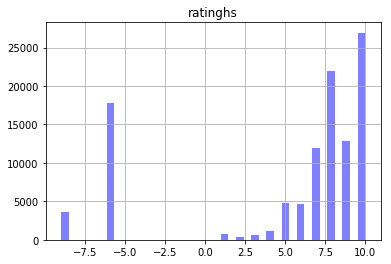

In [50]:
#Comparing the satisfaction of the house with first-time homebuyers and other buyers
FirstTime = household_181[household_181.firsthome == 1]
NotFirstTime = household_181[household_181.firsthome != 1]

FirstTime.hist(column = 'ratinghs', bins = 40, color = 'teal', \
           alpha = 0.5)
NotFirstTime.hist(column = 'ratinghs', bins = 40, color = 'blue', \
            alpha = 0.5)
plt.show()

In [140]:
len(household_181[household_181['firsthome'] == 1])

28804

In [125]:
#Test Hypothesis 1: A majority of first-time homebuyers found their home via the internet
#Count the yeses, "1", for each of the seven search categories
#Filter by first-time homebuyers #Relation between method of finding a home and the average satisfaction rating that first-time homebuyers gave their home.
print('The average satisfaction rating that first-time homebuyers gave their home, based on the method of how they found their home.')
filter_listPUB = ['1']
PUB = household_181[(household_181.firsthome == 1) & household_181.searchpub.isin(filter_listPUB)]
print('Homebuyers who found their home through news print gave their home a score of', PUB['ratinghs'].agg(np.mean))

filter_listSIGN = ['1']
SIGN = household_181[(household_181.firsthome == 1) & household_181.searchsign.isin(filter_listSIGN)]
print('Homebuyers who found their home from a sign gave their home a score of', SIGN['ratinghs'].agg(np.mean))

filter_listNET = ['1']
NET = household_181[(household_181.firsthome == 1) & household_181.searchnet.isin(filter_listNET)]
print('Homebuyers who used the internet gave their home a score of', NET['ratinghs'].agg(np.mean))

filter_listLIST = ['1']
LIST = household_181[(household_181.firsthome == 1) & household_181.searchlist.isin(filter_listLIST)]
print('Homebuyers who found their home in a listing gave their home a score of', LIST['ratinghs'].agg(np.mean))

filter_listRA = ['1']
RA = household_181[(household_181.firsthome == 1) & household_181.searchrea.isin(filter_listRA)]
print('Homebuyers who used a real estate agent gave their home a score of', RA['ratinghs'].agg(np.mean))

filter_listFAM = ['1']
FAM = household_181[(household_181.firsthome == 1) & household_181.searchfam.isin(filter_listFAM)]
print('Homebuyers who used family/friend/word of mouth gave their home a score of', FAM['ratinghs'].agg(np.mean))

filter_listOTH = ['1']
OTH = household_181[(household_181.firsthome == 1) & household_181.searchoth.isin(filter_listOTH)]
print('Homebuyers who used another method to find their home gave their home a score of', OTH['ratinghs'].agg(np.mean))
#Conclusion: The most popular method for finding a new home was through a real estate agent

Agent = household_181[(household_181.firsthome == 1) & (household_181.searchrea == 1)]
print(len(Agent.index), "first-time homebuyers found their home through a real estate agent")
Internet = household_181[(household_181.firsthome == 1) & (household_181.searchnet == 1)]
print(len(Internet.index), "first-time homebuyers found their home through the internet")
Family = household_181[(household_181.firsthome == 1) & (household_181.searchfam == 1)]
print(len(Family.index), "first-time homebuyers found their home through family, friends, or word of mouth")
Sign = household_181[(household_181.firsthome == 1) & (household_181.searchsign == 1)]
print(len(Sign.index), "first-time homebuyers found their home by seeing a sign outside the building")
Other = household_181[(household_181.firsthome == 1) & (household_181.searchoth == 1)]
print(len(Other.index), "first-time homebuyers found their home through some other method")
Publication = household_181[(household_181.firsthome == 1) & (household_181.searchpub == 1)]
print(len(Publication.index), "first-time homebuyers found their home through newsprint or some publication")
List = household_181[(household_181.firsthome == 1) & (household_181.searchlist == 1)]
print(len(List.index), "first-time homebuyers found their home through a listing from apartment rental agency listing")

1651 first-time homebuyers found their home through a real estate agent
1202 first-time homebuyers found their home through the internet
836 first-time homebuyers found their home through family, friends, or word of mouth
267 first-time homebuyers found their home by seeing a sign outside the building
242 first-time homebuyers found their home through some other method
93 first-time homebuyers found their home through newsprint or some publication
71 first-time homebuyers found their home through a listing from apartment rental agency listing


In [155]:
#Relation between method of finding a home and the average satisfaction rating that first-timprint('The average satisfaction rating that first-time homebuyers gave their home, based on the method of how they found their home.')
filter_listPUB = ['1']
PUB = household_181[(household_181.firsthome == 1) & household_181.searchpub.isin(filter_listPUB)]
print('Homebuyers who found their home through news print gave their home a score of', PUB['ratinghs'].agg(np.mean))

filter_listSIGN = ['1']
SIGN = household_181[(household_181.firsthome == 1) & household_181.searchsign.isin(filter_listSIGN)]
print('Homebuyers who found their home from a sign gave their home a score of', SIGN['ratinghs'].agg(np.mean))

filter_listNET = ['1']
NET = household_181[(household_181.firsthome == 1) & household_181.searchnet.isin(filter_listNET)]
print('Homebuyers who used the internet gave their home a score of', NET['ratinghs'].agg(np.mean))

filter_listLIST = ['1']
LIST = household_181[(household_181.firsthome == 1) & household_181.searchlist.isin(filter_listLIST)]
print('Homebuyers who found their home in a listing gave their home a score of', LIST['ratinghs'].agg(np.mean))

filter_listRA = ['1']
RA = household_181[(household_181.firsthome == 1) & household_181.searchrea.isin(filter_listRA)]
print('Homebuyers who used a real estate agent gave their home a score of', RA['ratinghs'].agg(np.mean))

filter_listFAM = ['1']
FAM = household_181[(household_181.firsthome == 1) & household_181.searchfam.isin(filter_listFAM)]
print('Homebuyers who used family/friend/word of mouth gave their home a score of', FAM['ratinghs'].agg(np.mean))

filter_listOTH = ['1']
OTH = household_181[(household_181.firsthome == 1) & household_181.searchoth.isin(filter_listOTH)]
print('Homebuyers who used another method to find their home gave their home a score of', OTH['ratinghs'].agg(np.mean))


The average satisfaction rating that first-time homebuyers gave their home, based on the method of how they found their home.
Homebuyers who found their home through news print gave their home a score of 8.666666666666666
Homebuyers who found their home from a sign gave their home a score of 8.588014981273409
Homebuyers who used the internet gave their home a score of 8.516638935108153
Homebuyers who found their home in a listing gave their home a score of 8.507042253521126
Homebuyers who used a real estate agent gave their home a score of 8.493034524530588
Homebuyers who used family/friend/word of mouth gave their home a score of 8.392344497607656
Homebuyers who used another method to find their home gave their home a score of 8.152892561983471


In [131]:
#Test Hypothesis 2: The most popular reason why people moved was due to a long commute
#Count the yeses, "1", for each of the nine reasons moved categories
#Filter by first-time homebuyers
#Conclusion: The most popular reason why people moved was to live in a better home

BetterHome = household_181[(household_181.firsthome == 1) & (household_181.rmhome == 1)]
print(len(BetterHome.index), "first-time homebuyers moved because they wanted to live in a better home")
OwnHome = household_181[(household_181.firsthome == 1) & (household_181.rmownhh == 1)]
print(len(OwnHome.index), "first-time homebuyers moved because they wanted to live in their own household")
BetterNeighborhood = household_181[(household_181.firsthome == 1) & (household_181.rmhood == 1)]
print(len(BetterNeighborhood.index), "first-time homebuyers moved because they wanted to live in a better neighborhood")
FamilyReasons = household_181[(household_181.firsthome == 1) & (household_181.rmfamily == 1)]
print(len(FamilyReasons.index), "first-time homebuyers moved because of family")
ReduceCost = household_181[(household_181.firsthome == 1) & (household_181.rmcosts == 1)]
print(len(ReduceCost.index), "first-time homebuyers moved because they wanted to reduce costs")
Change = household_181[(household_181.firsthome == 1) & (household_181.rmchange == 1)]
print(len(Change.index), "first-time homebuyers moved because of a change in household")
OtherReason = household_181[(household_181.firsthome == 1) & (household_181.rmother == 1)]
print(len(OtherReason.index), "first-time homebuyers moved for some other reason")
Commute = household_181[(household_181.firsthome == 1) & (household_181.rmcommute == 1)]
print(len(Commute.index), "first-time homebuyers moved because they wanted to reduce commute")
Job = household_181[(household_181.firsthome == 1) & (household_181.rmjob == 1)]
print(len(Job.index), "first-time homebuyers moved due to a job")

1821 first-time homebuyers moved because they wanted to live in a better home
1722 first-time homebuyers moved because they wanted to live in their own household
1364 first-time homebuyers moved because they wanted to live in a better neighborhood
577 first-time homebuyers moved because of family
566 first-time homebuyers moved because they wanted to reduce costs
540 first-time homebuyers moved because of a change in household
424 first-time homebuyers moved for some other reason
369 first-time homebuyers moved because they wanted to reduce commute
342 first-time homebuyers moved due to a job


In [158]:
#Relation between reason for moving and the average satisfaction rating that first-time homebuyers gave their home.
print('The average satisfaction rating that first-time homebuyers gave their home, based on the reason they moved.')

filter_listHOME = ['1']
HOME = household_181[(household_181.firsthome == 1) & household_181.rmhome.isin(filter_listHOME)]
print('Homebuyers who moved to live in a better home gave their home a score of', PUB['ratinghs'].agg(np.mean))

filter_listHOOD = ['1']
HOOD = household_181[(household_181.firsthome == 1) & household_181.rmhood.isin(filter_listHOOD)]
print('Homebuyers who moved to live in a better neighborhood gave their home a score of', HOOD['ratinghs'].agg(np.mean))

filter_listJOB = ['1']
JOB = household_181[(household_181.firsthome == 1) & household_181.rmjob.isin(filter_listJOB)]
print('Homebuyers who moved for a job gave their home a score of', JOB['ratinghs'].agg(np.mean))

filter_listCHAN = ['1']
CHAN = household_181[(household_181.firsthome == 1) & household_181.rmchange.isin(filter_listCHAN)]
print('Homebuyers who moved because of a change in household gave their home a score of', CHAN['ratinghs'].agg(np.mean))

filter_listOWN = ['1']
OWN = household_181[(household_181.firsthome == 1) & household_181.rmownhh.isin(filter_listOWN)]
print('Homebuyers who moved to live in their own household gave their home a score of', OWN['ratinghs'].agg(np.mean))

filter_listCOM = ['1']
COM = household_181[(household_181.firsthome == 1) & household_181.rmcommute.isin(filter_listCOM)]
print('Homebuyers who moved to reduce commute gave their home a score of', COM['ratinghs'].agg(np.mean))

filter_listCOSTS = ['1']
COSTS = household_181[(household_181.firsthome == 1) & household_181.rmcosts.isin(filter_listCOSTS)]
print('Homebuyers who moved to reduce costs gave their home a score of', COSTS['ratinghs'].agg(np.mean))

filter_listFAMILY = ['1']
FAMILY = household_181[(household_181.firsthome == 1) & household_181.rmfamily.isin(filter_listFAMILY)]
print('Homebuyers who moved because of family gave their home a score of', FAMILY['ratinghs'].agg(np.mean))

filter_listOT = ['1']
OT = household_181[(household_181.firsthome == 1) & household_181.rmother.isin(filter_listOT)]
print('Homebuyers who moved for some other reason gave their home a score of', OT['ratinghs'].agg(np.mean))

The average satisfaction rating that first-time homebuyers gave their home, based on the reason they moved.
Homebuyers who moved to live in a better home gave their home a score of 8.666666666666666
Homebuyers who moved to live in a better neighborhood gave their home a score of 8.649560117302054
Homebuyers who moved for a job gave their home a score of 8.514619883040936
Homebuyers who moved because of a change in household gave their home a score of 8.512962962962963
Homebuyers who moved to live in their own household gave their home a score of 8.448315911730546
Homebuyers who moved to reduce commute gave their home a score of 8.279132791327914
Homebuyers who moved to reduce costs gave their home a score of 8.27208480565371
Homebuyers who moved because of family gave their home a score of 8.251299826689774
Homebuyers who moved for some other reason gave their home a score of 8.24056603773585


In [146]:
#Filtering by first-time homebuyers and mobile home/trailer, single family home, and RV/Van/Boat etc.
filter_listX = ['2']
X = household_181[(household_181.firsthome == 1) & household_181.bld.isin(filter_listX)]
print(len(X.index), "first-time homebuyers moved to a detached single family house")

filter_listXX = ['3']
XX = household_181[(household_181.firsthome == 1) & household_181.bld.isin(filter_listXX)]
print(len(XX.index), "first-time homebuyers moved to an attached single family house")

#Filtering by first-time homebuyers and mobile home/trailer, RV/Van/Boat etc.
filter_listZ = ['1', '10']
Z = household_181[(household_181.firsthome == 1) & household_181.bld.isin(filter_listZ)]
print(len(Z.index), "first-time homebuyers moved to a mobile home, trailer, RV, boat, van, or other structure")

#Filtering by first-time homebuyers and apartment
filter_listY = ['4', '5', '6', '7', '8', '9']
Y = household_181[(household_181.firsthome == 1) & household_181.bld.isin(filter_listY)]
print(len(Y.index), "first-time homebuyers moved to a unit with 2 or more apartments")

23105 first-time homebuyers moved to a detached single family house
2313 first-time homebuyers moved to an attached single family house
1740 first-time homebuyers moved to a mobile home, trailer, RV, boat, van, or other structure
1646 first-time homebuyers moved to a unit with 2 or more apartments


In [163]:
# Average household satisfaction rating for first-time homeowners by each style of home
print('The average satisfaction rating that first-time homebuyers gave their home, based on the style of home.')

X = household_181[(household_181.firsthome == 1) & household_181.bld.isin(filter_listX)]
print('Homebuyers who moved to a detached single-family home gave their home a score of', X['ratinghs'].agg(np.mean))

Y = household_181[(household_181.firsthome == 1) & household_181.bld.isin(filter_listY)]
print('Homebuyers who moved to a unit with 2 or more apartments gave their home a score of', Y['ratinghs'].agg(np.mean))

XX = household_181[(household_181.firsthome == 1) & household_181.bld.isin(filter_listXX)]
print('Homebuyers who moved to an attached single-family home gave their home a score of', XX['ratinghs'].agg(np.mean))

Z = household_181[(household_181.firsthome == 1) & household_181.bld.isin(filter_listZ)]
print('Homebuyers who moved to a mobile home, trailer, RV, boat, van, or other structure gave their home a score of', Z['ratinghs'].agg(np.mean))

The average satisfaction rating that first-time homebuyers gave their home, based on the style of home.
Homebuyers who moved to a detached single-family home gave their home a score of 8.166587318762172
Homebuyers who moved to a unit with 2 or more apartments gave their home a score of 8.040704738760631
Homebuyers who moved to an attached single-family home gave their home a score of 8.010808473843493
Homebuyers who moved to a mobile home, trailer, RV, boat, van, or other structure gave their home a score of 7.641379310344828


In [179]:
NeighborhoodRating = household_181.groupby(['ratingnh'])
NeighborhoodRating['marketval'].agg(np.mean)

ratingnh
-9.0     171989.286116
-6.0     194919.044553
 1.0      43183.585308
 2.0      46695.512116
 3.0      47214.437331
 4.0      60356.460214
 5.0      73617.358255
 6.0     101602.368514
 7.0     129878.374862
 8.0     178162.611092
 9.0     229986.656049
 10.0    239782.102724
Name: marketval, dtype: float64

In [178]:
Serious = household_181.groupby(['nhqscrime'])
Serious['marketval'].agg(np.mean)

nhqscrime
-9.0    157820.600000
-6.0    212353.232778
 1.0     78539.090254
 2.0    192672.914109
Name: marketval, dtype: float64

In [177]:
Petty = household_181.groupby(['nhqpcrime'])
Petty['marketval'].agg(np.mean)

nhqpcrime
-9.0    155213.467138
-6.0    212353.232778
 1.0    104616.133330
 2.0    203376.795365
Name: marketval, dtype: float64

In [174]:
School = household_181.groupby(['nhqschool'])
School['marketval'].agg(np.mean)

nhqschool
-9.0    134692.822809
-6.0    212353.232778
 1.0    195800.331405
 2.0    133709.915207
Name: marketval, dtype: float64

In [175]:
Transport = household_181.groupby(['nhqpubtrn'])
Transport['marketval'].agg(np.mean)

nhqpubtrn
-9.0    177362.131925
-6.0    212353.232778
 1.0    169065.494728
 2.0    198402.229625
Name: marketval, dtype: float64

In [176]:
Risk = household_181.groupby(['nhqrisk'])
Risk['marketval'].agg(np.mean)

nhqrisk
-9.0    172116.373118
-6.0    212353.232778
 1.0    186440.537453
 2.0    183129.014940
Name: marketval, dtype: float64

In [180]:
Trash = household_181.groupby(['neartrash'])
Trash['marketval'].agg(np.mean)

neartrash
-9.0    180452.818987
-6.0    212353.232778
 1.0     75149.222746
 2.0     82089.723002
 3.0    192708.124718
Name: marketval, dtype: float64

In [183]:
Bars = household_181.groupby(['nearbarcl'])
Bars['marketval'].agg(np.mean)

nearbarcl
-9.0    160017.342215
-6.0    212353.232778
 1.0    148085.476815
 2.0    113049.741636
 3.0    189999.629098
Name: marketval, dtype: float64

In [184]:
Abandoned = household_181.groupby(['nearaband'])
Abandoned['marketval'].agg(np.mean)

nearaband
-9.0    167642.747332
-6.0    212353.232778
 1.0     97608.982621
 2.0     59612.563290
 3.0    190687.279410
 4.0    208721.542254
Name: marketval, dtype: float64